<a href="https://colab.research.google.com/github/dani-ctes/Machine_Learning/blob/main/Departamentos_en_Ventas_2016_BA_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# APARMENT PRICES CABA 2016

## Loading Lybrary

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## READING DATAFRAME

In [118]:
df = pd.read_csv('departamentos-en-venta-2016.csv', sep = ';',  na_values='#N/D', index_col= 'ID_ZONAPRO')

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7564 entries, 42408691 to 42394651
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CALLE                    6182 non-null   object 
 1   NUMERO                   6182 non-null   float64
 2   OPERACION                7564 non-null   object 
 3   TIPO                     7564 non-null   object 
 4   M2                       7564 non-null   int64  
 5   M2CUB                    7564 non-null   int64  
 6   PRECIOTEXT               7562 non-null   object 
 7   PRECIOARS                7564 non-null   int64  
 8   PRECIOARSM               7564 non-null   int64  
 9   DOLARES                  7564 non-null   int64  
 10  U_S_M2                   7564 non-null   int64  
 11  AMBIENTES                7564 non-null   int64  
 12  ANTIGUEDAD               7564 non-null   int64  
 13  BAÑOS                    7564 non-null   int64  
 14  DIRECCION    

In [120]:
df_ml = df.copy()

In [121]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7564 entries, 42408691 to 42394651
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CALLE                    6182 non-null   object 
 1   NUMERO                   6182 non-null   float64
 2   OPERACION                7564 non-null   object 
 3   TIPO                     7564 non-null   object 
 4   M2                       7564 non-null   int64  
 5   M2CUB                    7564 non-null   int64  
 6   PRECIOTEXT               7562 non-null   object 
 7   PRECIOARS                7564 non-null   int64  
 8   PRECIOARSM               7564 non-null   int64  
 9   DOLARES                  7564 non-null   int64  
 10  U_S_M2                   7564 non-null   int64  
 11  AMBIENTES                7564 non-null   int64  
 12  ANTIGUEDAD               7564 non-null   int64  
 13  BAÑOS                    7564 non-null   int64  
 14  DIRECCION    

## Analizing values

REVISION and NOTA have only Nan then dorp these

In [122]:
df_ml.drop(['REVISION','NOTA'], axis=1, inplace=True)

In [123]:
df_ml

,CALLE,NUMERO,OPERACION,TIPO,M2,M2CUB,PRECIOTEXT,PRECIOARS,PRECIOARSM,DOLARES,...,PUBLICADO,PROCESADO,URL,DIRECCION_NORMALIZADA,BARRIO,COMUNA,CODIGO_POSTAL,CODIGO_POSTAL_ARGENTINO,LATITUD,LONGITUD
ID_ZONAPRO,,,,,,,,,,,,,,,,,,,,,
42408691,GUATEMALA,5574.0,VTA,DTO,57,50,U$S 170.150,2977625,59553,170150,...,27/11/2016,12/10/2017,HTTP://WWW.ZONAPROP.COM.AR/PROPIEDADES/A-42408...,GUATEMALA 5574,PALERMO,COMUNA 14,1425.0,C1425BVH,-34.580581,-58.431758
42408710,ZAPATA,300.0,VTA,DTO,46,46,U$S 118.650,2076375,45139,118650,...,27/11/2016,12/10/2017,HTTP://WWW.ZONAPROP.COM.AR/PROPIEDADES/A-42408...,ZAPATA 300,PALERMO,COMUNA 14,1426.0,C1426AED,-34.573870,-58.440609
42518390,ZAPATA,300.0,VTA,DTO,61,56,U$S 181.470,3175725,56709,181470,...,27/11/2016,11/10/2017,HTTP://WWW.ZONAPROP.COM.AR/PROPIEDADES/A-42518...,ZAPATA 300,PALERMO,COMUNA 14,1426.0,C1426AED,-34.573870,-58.440609
42518402,ZAPATA,300.0,VTA,DTO,140,76,U$S 320.000,5600000,73684,320000,...,27/11/2016,11/10/2017,HTTP://WWW.ZONAPROP.COM.AR/PROPIEDADES/A-42518...,ZAPATA 300,PALERMO,COMUNA 14,1426.0,C1426AED,-34.573870,-58.440609
42621693,"JUSTO, JUAN B. AV.",2300.0,VTA,DTO,39,33,U$S 82.116,1437030,43546,82116,...,27/7/2016,10/10/2017,HTTP://WWW.ZONAPROP.COM.AR/PROPIEDADES/A-42621...,"JUSTO, JUAN B. AV. 2300",VILLA CRESPO,COMUNA 15,1414.0,C1414CWY,-34.592984,-58.441542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42302009,NaN,NaN,VTA,DTO,37,32,U$S 84.700,1482250,0,84700,...,16/3/2016,17/10/2017,HTTP://WWW.ZONAPROP.COM.AR/PROPIEDADES/A-42302...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42302010,NaN,NaN,VTA,DTO,44,44,U$S 99.000,1732500,0,99000,...,16/3/2016,17/10/2017,HTTP://WWW.ZONAPROP.COM.AR/PROPIEDADES/A-42302...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42302011,NaN,NaN,VTA,DTO,45,40,U$S 95.220,1666350,0,95220,...,16/3/2016,17/10/2017,HTTP://WWW.ZONAPROP.COM.AR/PROPIEDADES/A-42302...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7564 entries, 42408691 to 42394651
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CALLE                    6182 non-null   object 
 1   NUMERO                   6182 non-null   float64
 2   OPERACION                7564 non-null   object 
 3   TIPO                     7564 non-null   object 
 4   M2                       7564 non-null   int64  
 5   M2CUB                    7564 non-null   int64  
 6   PRECIOTEXT               7562 non-null   object 
 7   PRECIOARS                7564 non-null   int64  
 8   PRECIOARSM               7564 non-null   int64  
 9   DOLARES                  7564 non-null   int64  
 10  U_S_M2                   7564 non-null   int64  
 11  AMBIENTES                7564 non-null   int64  
 12  ANTIGUEDAD               7564 non-null   int64  
 13  BAÑOS                    7564 non-null   int64  
 14  DIRECCION    

In [125]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in df_ml.columns if
                    df_ml[cname].nunique() < 15 and
                    df_ml[cname].dtype == "object"]

In [127]:
categorical_cols

['OPERACION', 'TIPO', 'PROCESADO']

In [128]:
eda_categorical_cols = df_ml.loc[:, ['OPERACION', 'TIPO', 'PROCESADO']]

In [129]:
eda_categorical_cols

,OPERACION,TIPO,PROCESADO
ID_ZONAPRO,,,
42408691,VTA,DTO,12/10/2017
42408710,VTA,DTO,12/10/2017
42518390,VTA,DTO,11/10/2017
42518402,VTA,DTO,11/10/2017
42621693,VTA,DTO,10/10/2017
...,...,...,...
42302009,VTA,DTO,17/10/2017
42302010,VTA,DTO,17/10/2017
42302011,VTA,DTO,17/10/2017


#### EDA VARIABLES CATEGÓRICAS

In [130]:
def graficos_eda_categoricos(cat):

    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (30, filas * 16))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

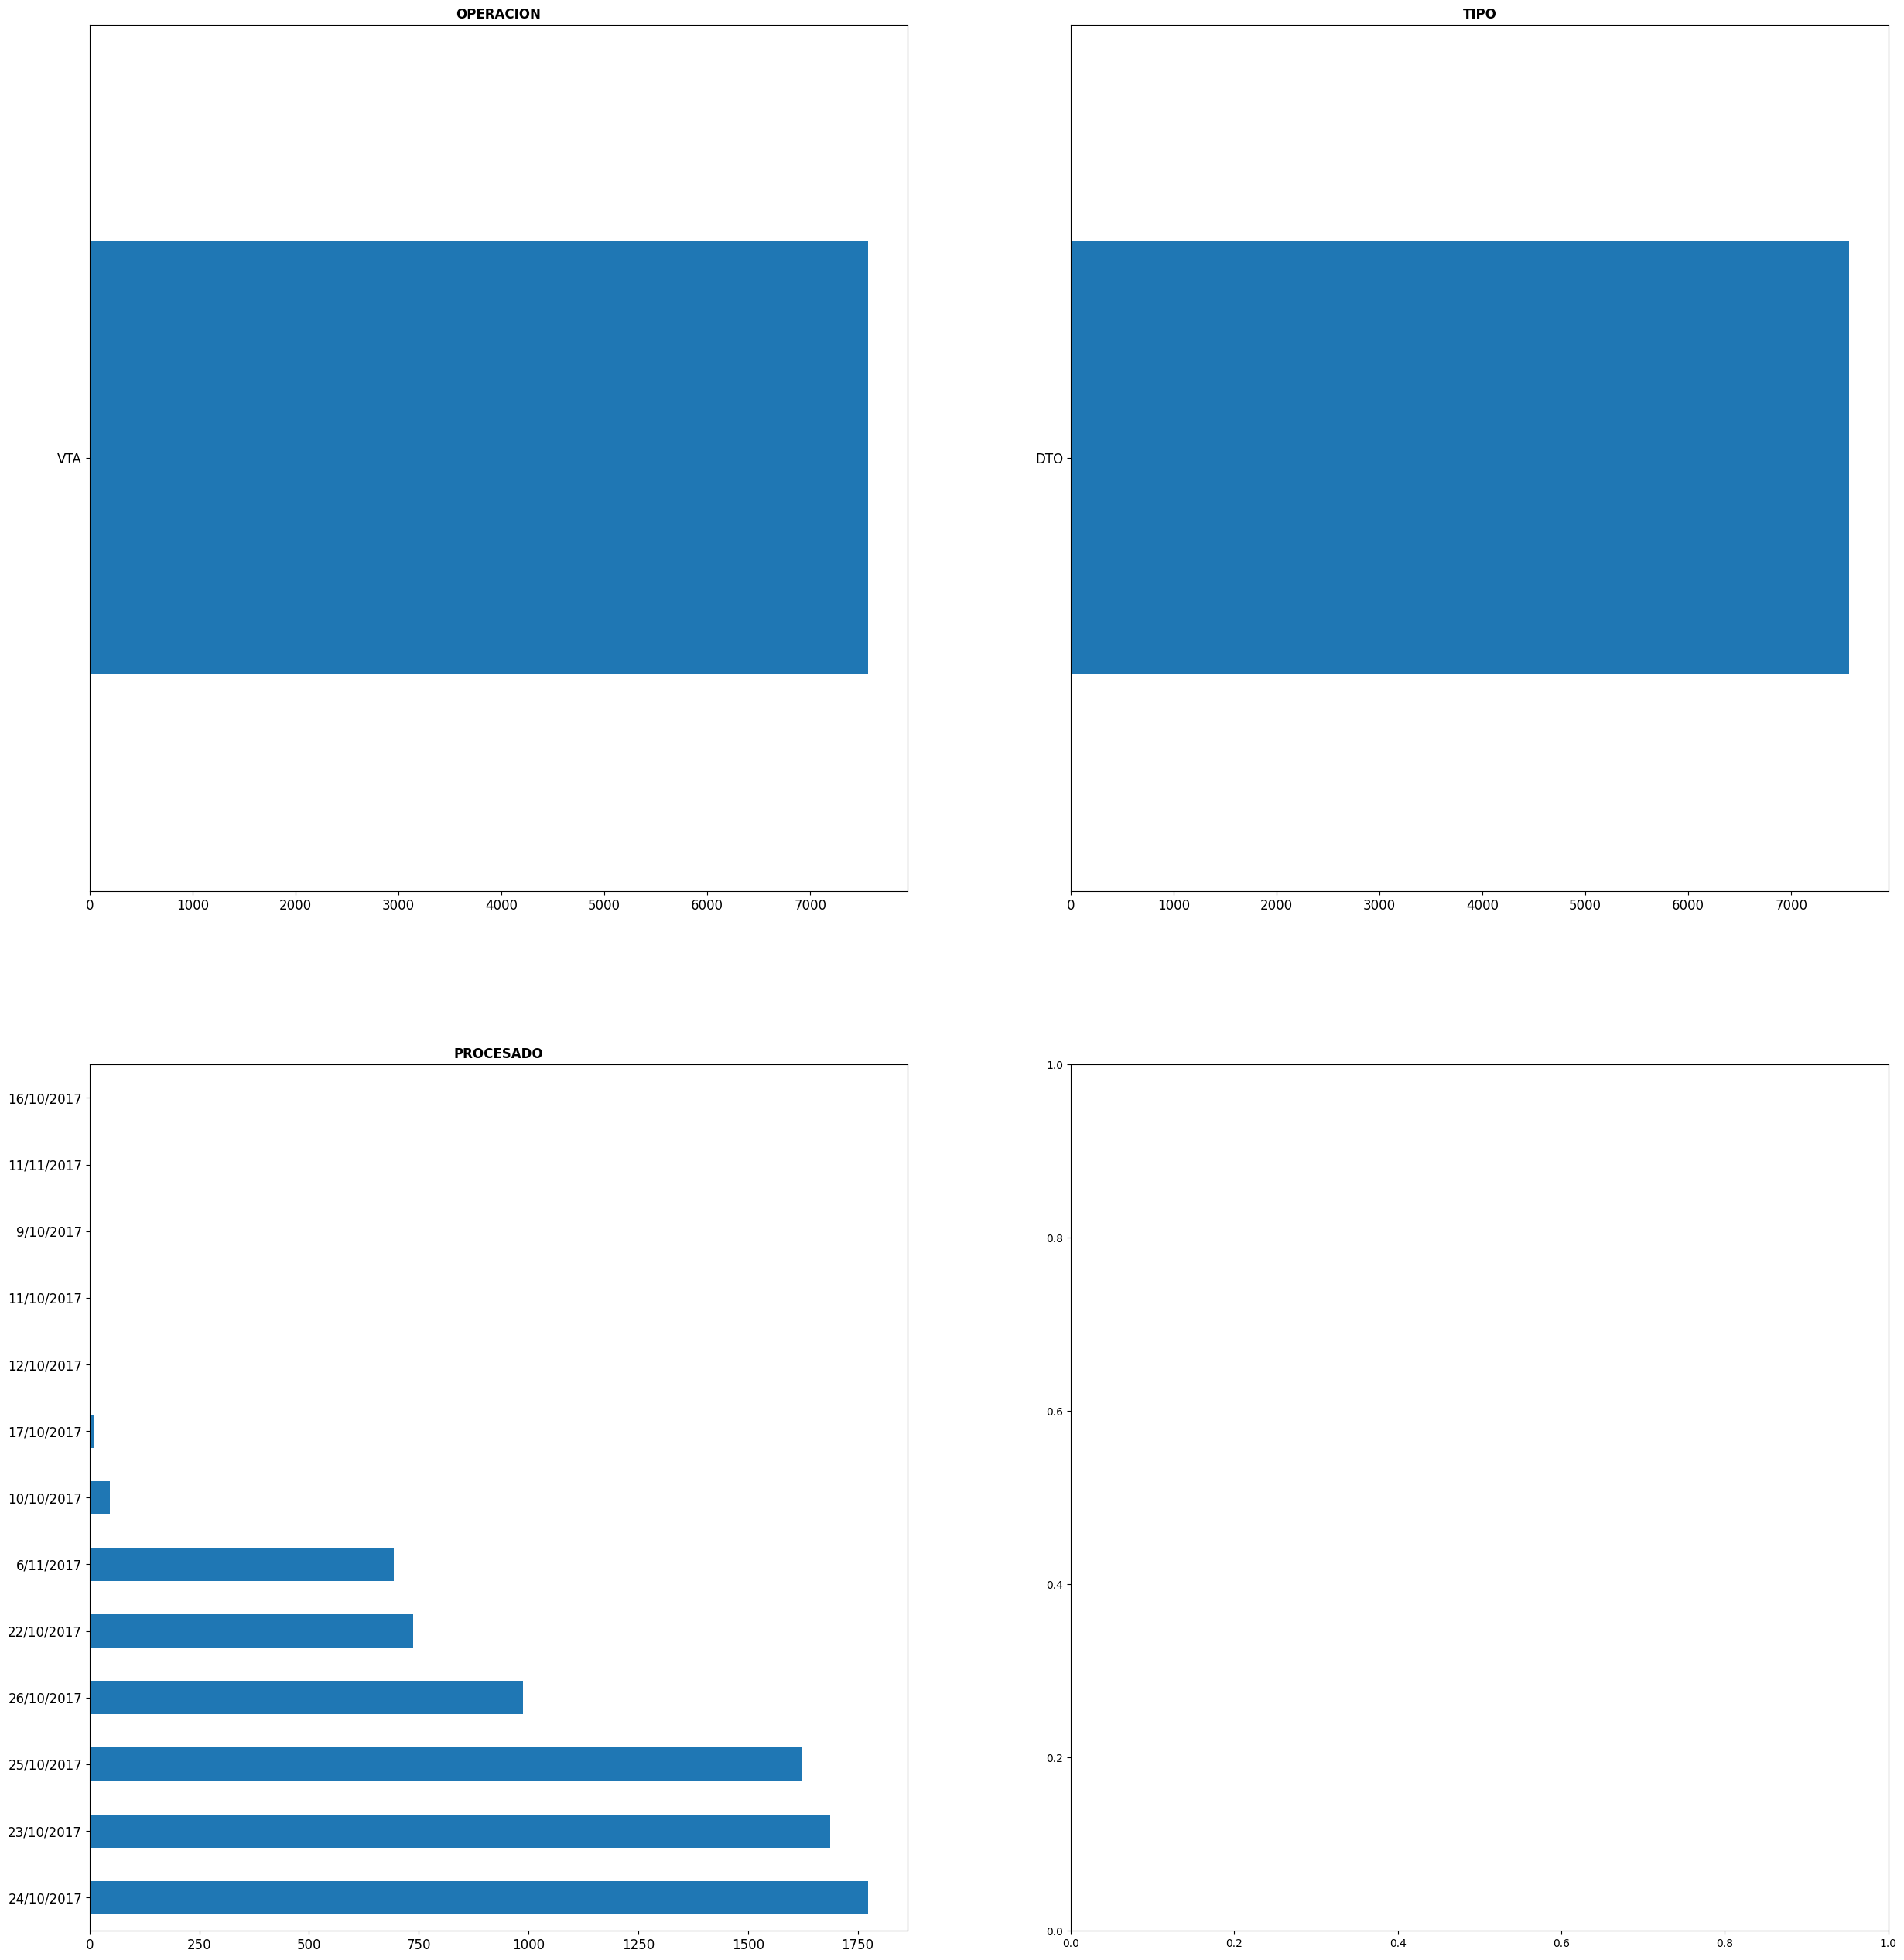

In [131]:
graficos_eda_categoricos(eda_categorical_cols)

#### Conclutions:

OPERACION and TIPO have only one value, and PROCESADO is the date when was load the data and doen´t important this. Then drop these!

In [132]:
df_ml.drop(['OPERACION','TIPO', 'PROCESADO'], axis=1, inplace=True)

In [133]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7564 entries, 42408691 to 42394651
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CALLE                    6182 non-null   object 
 1   NUMERO                   6182 non-null   float64
 2   M2                       7564 non-null   int64  
 3   M2CUB                    7564 non-null   int64  
 4   PRECIOTEXT               7562 non-null   object 
 5   PRECIOARS                7564 non-null   int64  
 6   PRECIOARSM               7564 non-null   int64  
 7   DOLARES                  7564 non-null   int64  
 8   U_S_M2                   7564 non-null   int64  
 9   AMBIENTES                7564 non-null   int64  
 10  ANTIGUEDAD               7564 non-null   int64  
 11  BAÑOS                    7564 non-null   int64  
 12  DIRECCION                7559 non-null   object 
 13  LOCATION                 7561 non-null   object 
 14  PUBLICADO    

In [134]:
df_ml.drop(['PRECIOARS','PRECIOARSM', 'PRECIOTEXT','PUBLICADO', 'CALLE', 'NUMERO', 'DIRECCION', 'LOCATION', 'DIRECCION_NORMALIZADA', 'URL', 'CODIGO_POSTAL_ARGENTINO', 'CODIGO_POSTAL' ], axis=1, inplace=True)

In [136]:
df_ml

,M2,M2CUB,DOLARES,U_S_M2,AMBIENTES,ANTIGUEDAD,BAÑOS,BARRIO,COMUNA,LATITUD,LONGITUD
ID_ZONAPRO,,,,,,,,,,,
42408691,57,50,170150,3403,2,2016,1,PALERMO,COMUNA 14,-34.580581,-58.431758
42408710,46,46,118650,2579,0,2016,1,PALERMO,COMUNA 14,-34.573870,-58.440609
42518390,61,56,181470,3241,2,2016,1,PALERMO,COMUNA 14,-34.573870,-58.440609
42518402,140,76,320000,4211,2,2016,1,PALERMO,COMUNA 14,-34.573870,-58.440609
42621693,39,33,82116,2488,0,2016,1,VILLA CRESPO,COMUNA 15,-34.592984,-58.441542
...,...,...,...,...,...,...,...,...,...,...,...
42302009,37,32,84700,2646,0,0,1,NaN,NaN,NaN,NaN
42302010,44,44,99000,2250,0,0,1,NaN,NaN,NaN,NaN
42302011,45,40,95220,2380,0,0,1,NaN,NaN,NaN,NaN


In [137]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7564 entries, 42408691 to 42394651
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   M2          7564 non-null   int64  
 1   M2CUB       7564 non-null   int64  
 2   DOLARES     7564 non-null   int64  
 3   U_S_M2      7564 non-null   int64  
 4   AMBIENTES   7564 non-null   int64  
 5   ANTIGUEDAD  7564 non-null   int64  
 6   BAÑOS       7564 non-null   int64  
 7   BARRIO      6182 non-null   object 
 8   COMUNA      6182 non-null   object 
 9   LATITUD     6182 non-null   float64
 10  LONGITUD    6182 non-null   float64
dtypes: float64(2), int64(7), object(2)
memory usage: 709.1+ KB


#### EDA VARIABLES NUMÉRICAS

In [139]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [140]:
estadisticos_cont(df_ml.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
M2,7564.0,70.383395,54.000000,51.311526,15.000000,41.000000,54.000000,80.000000,7.300000e+02
M2CUB,7564.0,61.119910,47.000000,44.097191,0.000000,37.000000,47.000000,70.000000,6.250000e+02
DOLARES,7564.0,184358.493125,128000.000000,190582.644987,6571.000000,93000.000000,128000.000000,195000.000000,4.500000e+06
U_S_M2,7564.0,2803.973427,2651.000000,923.884110,0.000000,2242.000000,2651.000000,3131.000000,1.250000e+04
AMBIENTES,7564.0,2.456372,2.000000,1.100323,0.000000,2.000000,2.000000,3.000000,1.000000e+01
ANTIGUEDAD,7564.0,710.604442,30.000000,952.690732,0.000000,1.000000,30.000000,2016.000000,2.016000e+03
BAÑOS,7564.0,1.250132,1.000000,0.754619,0.000000,1.000000,1.000000,2.000000,6.000000e+00
LATITUD,6182.0,-34.600101,-34.602220,0.024913,-34.684919,-34.622335,-34.602220,-34.582496,-3.453731e+01
LONGITUD,6182.0,-58.431524,-58.432092,0.033328,-58.527476,-58.453446,-58.432092,-58.406926,-5.835381e+01


In [142]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7564 entries, 42408691 to 42394651
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   M2          7564 non-null   int64  
 1   M2CUB       7564 non-null   int64  
 2   DOLARES     7564 non-null   int64  
 3   U_S_M2      7564 non-null   int64  
 4   AMBIENTES   7564 non-null   int64  
 5   ANTIGUEDAD  7564 non-null   int64  
 6   BAÑOS       7564 non-null   int64  
 7   BARRIO      6182 non-null   object 
 8   COMUNA      6182 non-null   object 
 9   LATITUD     6182 non-null   float64
 10  LONGITUD    6182 non-null   float64
dtypes: float64(2), int64(7), object(2)
memory usage: 709.1+ KB


In [143]:
eda_categorical_cols = df_ml.loc[:, ['BARRIO', 'COMUNA']]

In [144]:
eda_categorical_cols

,BARRIO,COMUNA
ID_ZONAPRO,,
42408691,PALERMO,COMUNA 14
42408710,PALERMO,COMUNA 14
42518390,PALERMO,COMUNA 14
42518402,PALERMO,COMUNA 14
42621693,VILLA CRESPO,COMUNA 15
...,...,...
42302009,NaN,NaN
42302010,NaN,NaN
42302011,NaN,NaN


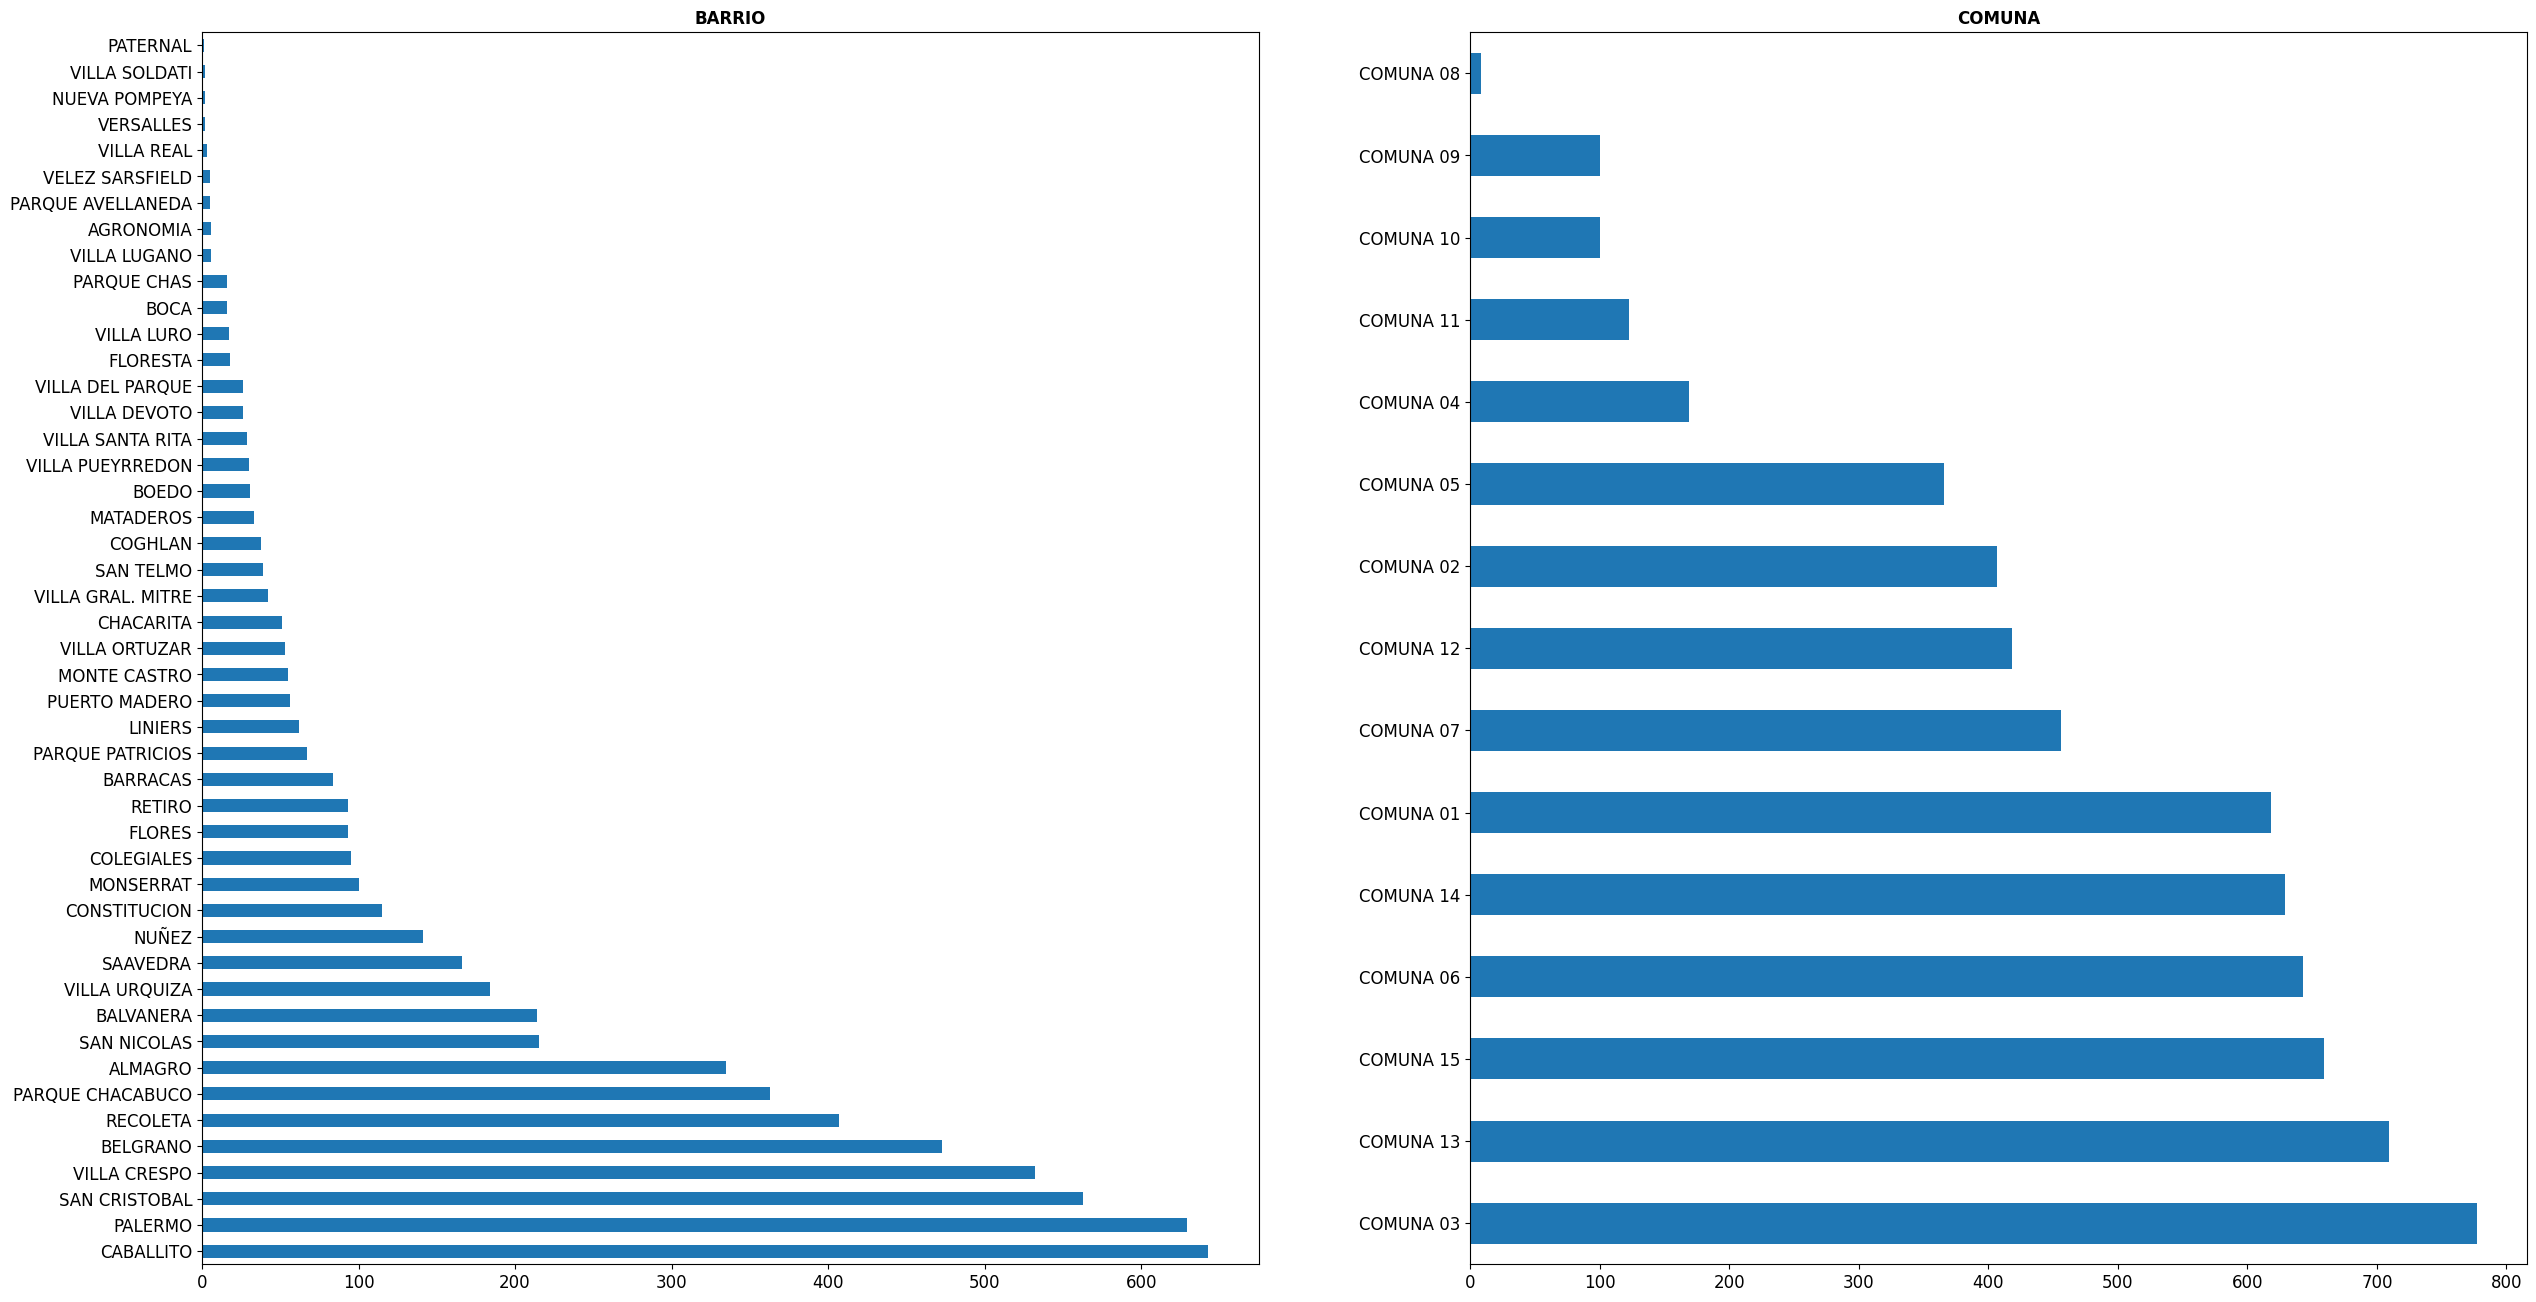

In [145]:
graficos_eda_categoricos(eda_categorical_cols)

Conclution:

Barrio imputar por: CABALLITO

COMUNA imputar por: COMUNA 03

LATITUD imputar por el promedio

LONGITUD imputar por el promedio

In [146]:
df_ml['BARRIO'] = df_ml['BARRIO'].fillna('CABALLITO')
df_ml['COMUNA'] = df_ml['COMUNA'].fillna('COMUNA 03')
df_ml['LATITUD'] = df_ml['LATITUD'].fillna(-34.600101)
df_ml['LONGITUD'] = df_ml['LONGITUD'].fillna(-58.431524)

In [148]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7564 entries, 42408691 to 42394651
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   M2          7564 non-null   int64  
 1   M2CUB       7564 non-null   int64  
 2   DOLARES     7564 non-null   int64  
 3   U_S_M2      7564 non-null   int64  
 4   AMBIENTES   7564 non-null   int64  
 5   ANTIGUEDAD  7564 non-null   int64  
 6   BAÑOS       7564 non-null   int64  
 7   BARRIO      7564 non-null   object 
 8   COMUNA      7564 non-null   object 
 9   LATITUD     7564 non-null   float64
 10  LONGITUD    7564 non-null   float64
dtypes: float64(2), int64(7), object(2)
memory usage: 709.1+ KB


### GENERACIÓN DE INSIGHTS

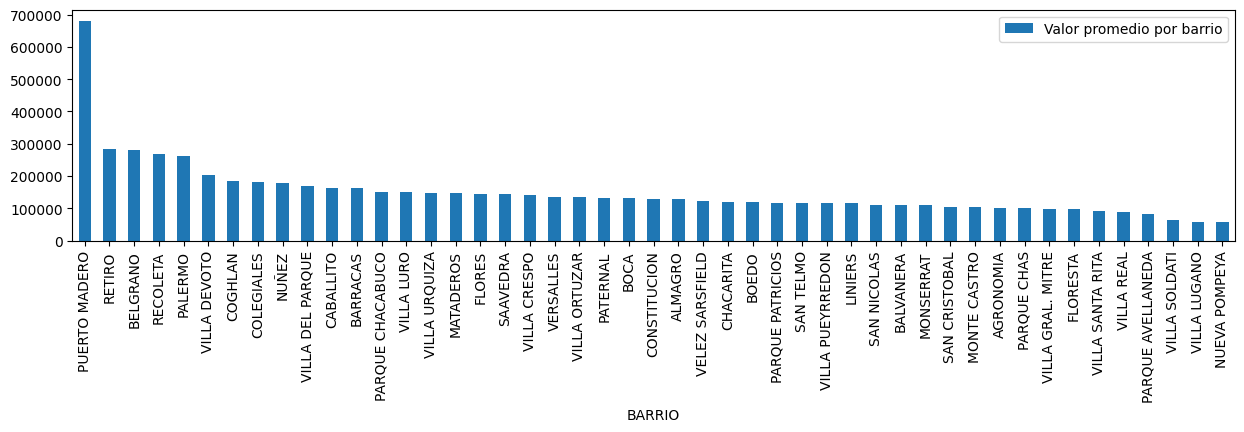

In [150]:
# Analisis por educación
temp = df.groupby('BARRIO').DOLARES.mean().sort_values(ascending = False)
temp

fig, ax = plt.subplots(figsize=(15,3))
temp.plot.bar()
plt.legend([ 'Valor promedio por barrio']);


## MODELO DE MACHINE LEARNING

### train test split

Problema:
Cuando se entrena el modelo solamente acepta int o float, los string tienen que estar convertidos a flotantes... Y hay 4 columnas con objects (BARRIO...) , lo que son strings y tenemos que pasarlos a float

In [151]:
df_ml

,M2,M2CUB,DOLARES,U_S_M2,AMBIENTES,ANTIGUEDAD,BAÑOS,BARRIO,COMUNA,LATITUD,LONGITUD
ID_ZONAPRO,,,,,,,,,,,
42408691,57,50,170150,3403,2,2016,1,PALERMO,COMUNA 14,-34.580581,-58.431758
42408710,46,46,118650,2579,0,2016,1,PALERMO,COMUNA 14,-34.573870,-58.440609
42518390,61,56,181470,3241,2,2016,1,PALERMO,COMUNA 14,-34.573870,-58.440609
42518402,140,76,320000,4211,2,2016,1,PALERMO,COMUNA 14,-34.573870,-58.440609
42621693,39,33,82116,2488,0,2016,1,VILLA CRESPO,COMUNA 15,-34.592984,-58.441542
...,...,...,...,...,...,...,...,...,...,...,...
42302009,37,32,84700,2646,0,0,1,CABALLITO,COMUNA 03,-34.600101,-58.431524
42302010,44,44,99000,2250,0,0,1,CABALLITO,COMUNA 03,-34.600101,-58.431524
42302011,45,40,95220,2380,0,0,1,CABALLITO,COMUNA 03,-34.600101,-58.431524


In [152]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7564 entries, 42408691 to 42394651
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   M2          7564 non-null   int64  
 1   M2CUB       7564 non-null   int64  
 2   DOLARES     7564 non-null   int64  
 3   U_S_M2      7564 non-null   int64  
 4   AMBIENTES   7564 non-null   int64  
 5   ANTIGUEDAD  7564 non-null   int64  
 6   BAÑOS       7564 non-null   int64  
 7   BARRIO      7564 non-null   object 
 8   COMUNA      7564 non-null   object 
 9   LATITUD     7564 non-null   float64
 10  LONGITUD    7564 non-null   float64
dtypes: float64(2), int64(7), object(2)
memory usage: 709.1+ KB


Transformar todas las variables categóricas a númericas

In [153]:
from sklearn.preprocessing import OneHotEncoder

#Categóricas
cat = df_ml.select_dtypes('O')

cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7564 entries, 42408691 to 42394651
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   BARRIO  7564 non-null   object
 1   COMUNA  7564 non-null   object
dtypes: object(2)
memory usage: 177.3+ KB


In [154]:
#Instanciamos
ohe = OneHotEncoder(sparse=False)

In [156]:
#Entrenamos
ohe.fit(cat)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(sparse=False, sparse_output=False)

In [157]:
#Aplicamos
cat_ohe = ohe.transform(cat)

In [158]:
#Ponemos los nombres
cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names_out(input_features = cat.columns)).reset_index(drop = True)

In [159]:
cat_ohe

,BARRIO_AGRONOMIA,BARRIO_ALMAGRO,BARRIO_BALVANERA,BARRIO_BARRACAS,BARRIO_BELGRANO,BARRIO_BOCA,BARRIO_BOEDO,BARRIO_CABALLITO,BARRIO_CHACARITA,BARRIO_COGHLAN,...,COMUNA_COMUNA 06,COMUNA_COMUNA 07,COMUNA_COMUNA 08,COMUNA_COMUNA 09,COMUNA_COMUNA 10,COMUNA_COMUNA 11,COMUNA_COMUNA 12,COMUNA_COMUNA 13,COMUNA_COMUNA 14,COMUNA_COMUNA 15
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Dataframe final

Seleccionamos las variables numéricas para poder juntarlas a las cat_hoe

In [160]:
num = df_ml.select_dtypes('number').reset_index(drop = True)

In [161]:
num

,M2,M2CUB,DOLARES,U_S_M2,AMBIENTES,ANTIGUEDAD,BAÑOS,LATITUD,LONGITUD
0,57,50,170150,3403,2,2016,1,-34.580581,-58.431758
1,46,46,118650,2579,0,2016,1,-34.573870,-58.440609
2,61,56,181470,3241,2,2016,1,-34.573870,-58.440609
3,140,76,320000,4211,2,2016,1,-34.573870,-58.440609
4,39,33,82116,2488,0,2016,1,-34.592984,-58.441542
...,...,...,...,...,...,...,...,...,...
7559,37,32,84700,2646,0,0,1,-34.600101,-58.431524
7560,44,44,99000,2250,0,0,1,-34.600101,-58.431524
7561,45,40,95220,2380,0,0,1,-34.600101,-58.431524
7562,44,39,95220,2441,0,0,1,-34.600101,-58.431524


Las juntamos todas en el dataframe final

In [162]:
df_ml_final = pd.concat([cat_ohe,num], axis = 1)

In [163]:
df_ml_final

,BARRIO_AGRONOMIA,BARRIO_ALMAGRO,BARRIO_BALVANERA,BARRIO_BARRACAS,BARRIO_BELGRANO,BARRIO_BOCA,BARRIO_BOEDO,BARRIO_CABALLITO,BARRIO_CHACARITA,BARRIO_COGHLAN,...,COMUNA_COMUNA 15,M2,M2CUB,DOLARES,U_S_M2,AMBIENTES,ANTIGUEDAD,BAÑOS,LATITUD,LONGITUD
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,57,50,170150,3403,2,2016,1,-34.580581,-58.431758
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,46,46,118650,2579,0,2016,1,-34.573870,-58.440609
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,61,56,181470,3241,2,2016,1,-34.573870,-58.440609
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,140,76,320000,4211,2,2016,1,-34.573870,-58.440609
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,39,33,82116,2488,0,2016,1,-34.592984,-58.441542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,37,32,84700,2646,0,0,1,-34.600101,-58.431524
7560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,44,44,99000,2250,0,0,1,-34.600101,-58.431524
7561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,45,40,95220,2380,0,0,1,-34.600101,-58.431524
7562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,44,39,95220,2441,0,0,1,-34.600101,-58.431524


In [164]:
y = df_ml_final.DOLARES

In [165]:
df_ml_final.drop(['DOLARES'], axis=1, inplace=True)

In [166]:
from sklearn.model_selection import train_test_split

In [167]:
# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(df_ml_final, y,
                                                                train_size=0.8, test_size=0.2,
                                                                random_state=0)

In [168]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [169]:
# Define model
model = RandomForestRegressor(n_estimators=100, random_state=0)

In [170]:
# Fit model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [171]:
pred = model.predict(X_valid)

In [173]:
print('MAE:', mean_absolute_error(y_valid, pred))

MAE: 4666.013414659531
